In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt

# Подготовка данных

In [109]:
data_class = pd.read_csv('../data/rainAUS_prepared.csv')
data_class

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,ord__Location,ord__WindDir9am,ord__WindGustDir,ord__WindDir3pm,ord__RainToday,RainTomorrow
0,12,13.4,22.9,0.6,4.0,44.0,20.0,24.0,71.0,22.0,...,8.0,7.0,16.9,21.8,2.0,13.0,13.0,14.0,0.0,0
1,12,7.4,25.1,0.0,4.0,44.0,4.0,22.0,44.0,25.0,...,7.0,7.0,17.2,24.3,2.0,6.0,14.0,15.0,0.0,0
2,12,12.9,25.7,0.0,4.0,46.0,19.0,26.0,38.0,30.0,...,7.0,2.0,21.0,23.2,2.0,13.0,15.0,15.0,0.0,0
3,12,9.2,28.0,0.0,4.0,24.0,11.0,9.0,45.0,16.0,...,7.0,7.0,18.1,26.5,2.0,9.0,4.0,0.0,0.0,0
4,12,17.5,32.3,1.0,4.0,41.0,7.0,20.0,82.0,33.0,...,7.0,8.0,17.8,29.7,2.0,1.0,13.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6,3.5,21.8,0.0,4.0,31.0,15.0,13.0,59.0,27.0,...,7.0,7.0,9.4,20.9,41.0,2.0,0.0,0.0,0.0,0
142189,6,2.8,23.4,0.0,4.0,31.0,13.0,11.0,51.0,24.0,...,7.0,7.0,10.1,22.4,41.0,9.0,0.0,1.0,0.0,0
142190,6,3.6,25.3,0.0,4.0,22.0,13.0,9.0,56.0,21.0,...,7.0,7.0,10.9,24.5,41.0,9.0,6.0,3.0,0.0,0
142191,6,5.4,26.9,0.0,4.0,37.0,9.0,9.0,53.0,24.0,...,7.0,7.0,12.5,26.1,41.0,9.0,3.0,14.0,0.0,0


In [110]:
y_cl = data_class['RainTomorrow'].to_numpy()
X_cl = data_class.drop(['RainTomorrow'], axis=1).to_numpy()

In [111]:
nm = NearMiss()
X_cl, y_cl = nm.fit_resample(X_cl, y_cl.ravel())

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
sc = StandardScaler()
X_cl = sc.fit_transform(X_cl)

In [114]:
from sklearn.metrics import f1_score, classification_report

In [115]:
class_stats = lambda y, y_pred: [
    print(classification_report(y, y_pred)),
    print(f'f1 : {f1_score(y, y_pred)}') 
]

In [116]:
make_input = lambda X, y: train_test_split(X, y, test_size=0.2, stratify = y)

# Тестирование PCA

In [117]:
from sklearn.linear_model import LogisticRegression

## Классификация

In [118]:
cls = lambda X, y: plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

### Без PCA

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      6375
           1       0.80      0.69      0.74      6376

    accuracy                           0.76     12751
   macro avg       0.76      0.76      0.76     12751
weighted avg       0.76      0.76      0.76     12751

f1 : 0.7402314271339929


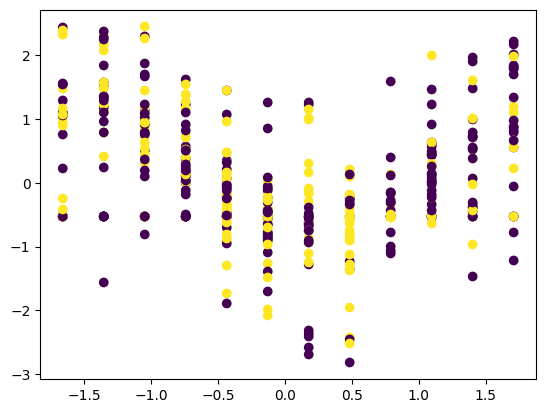

In [119]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = make_input(X_cl, y_cl)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
class_stats(y_test, y_pred)
cls(X_cl[:500], y_pred[:500])

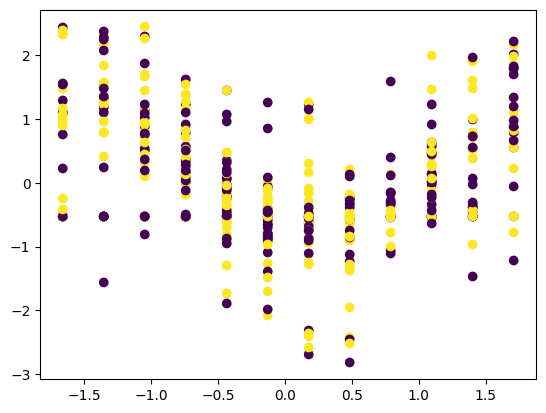

In [120]:
cls(X_cl[:500], y_test[:500])

### С PCA

In [121]:
import sys
sys.path.append("..")
from models.pca import myPCA

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      6375
           1       0.56      0.57      0.57      6376

    accuracy                           0.56     12751
   macro avg       0.56      0.56      0.56     12751
weighted avg       0.56      0.56      0.56     12751

f1 : 0.5650441440737558


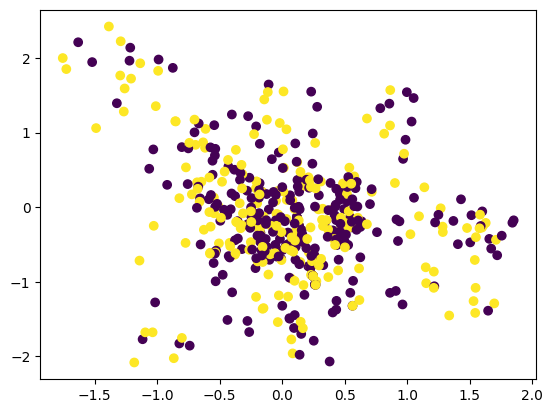

In [122]:
lr = LogisticRegression()
X_cl = myPCA(2).fit_transform(X_cl)
X_train, X_test, y_train, y_test = make_input(X_cl, y_cl)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
class_stats(y_test, y_pred)
cls(X_cl[:500], y_pred[:500])

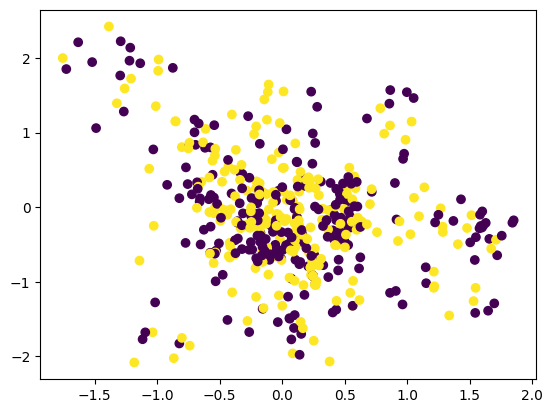

In [123]:
cls(X_cl[:500], y_test[:500])

## Кластеризация 

In [124]:
import sys
sys.path.append("..")
from models.kmeans import Kmeans

In [129]:
km = Kmeans(k = 2)
km.fit(X_cl)

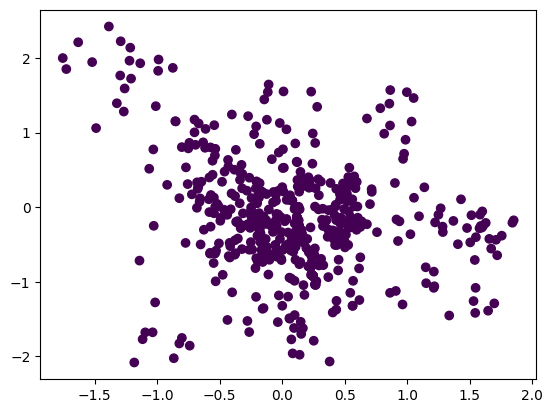

In [130]:
cls(X_cl[:500], y_cl[:500])

In [131]:
class_stats(y_cl, km.predict)

              precision    recall  f1-score   support

           0       0.48      0.34      0.40     31877
           1       0.49      0.63      0.55     31877

    accuracy                           0.49     63754
   macro avg       0.49      0.49      0.48     63754
weighted avg       0.49      0.49      0.48     63754

f1 : 0.5510419667723038


[None, None]